In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886040201PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.019e-02 +/- 1.153e-03 (43.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-21
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.808e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040201PNS003BGSPEC0001.FTZ
  Background Exposure Time: 1.808e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY8.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040201PNS003SRCARF0001.FTZ



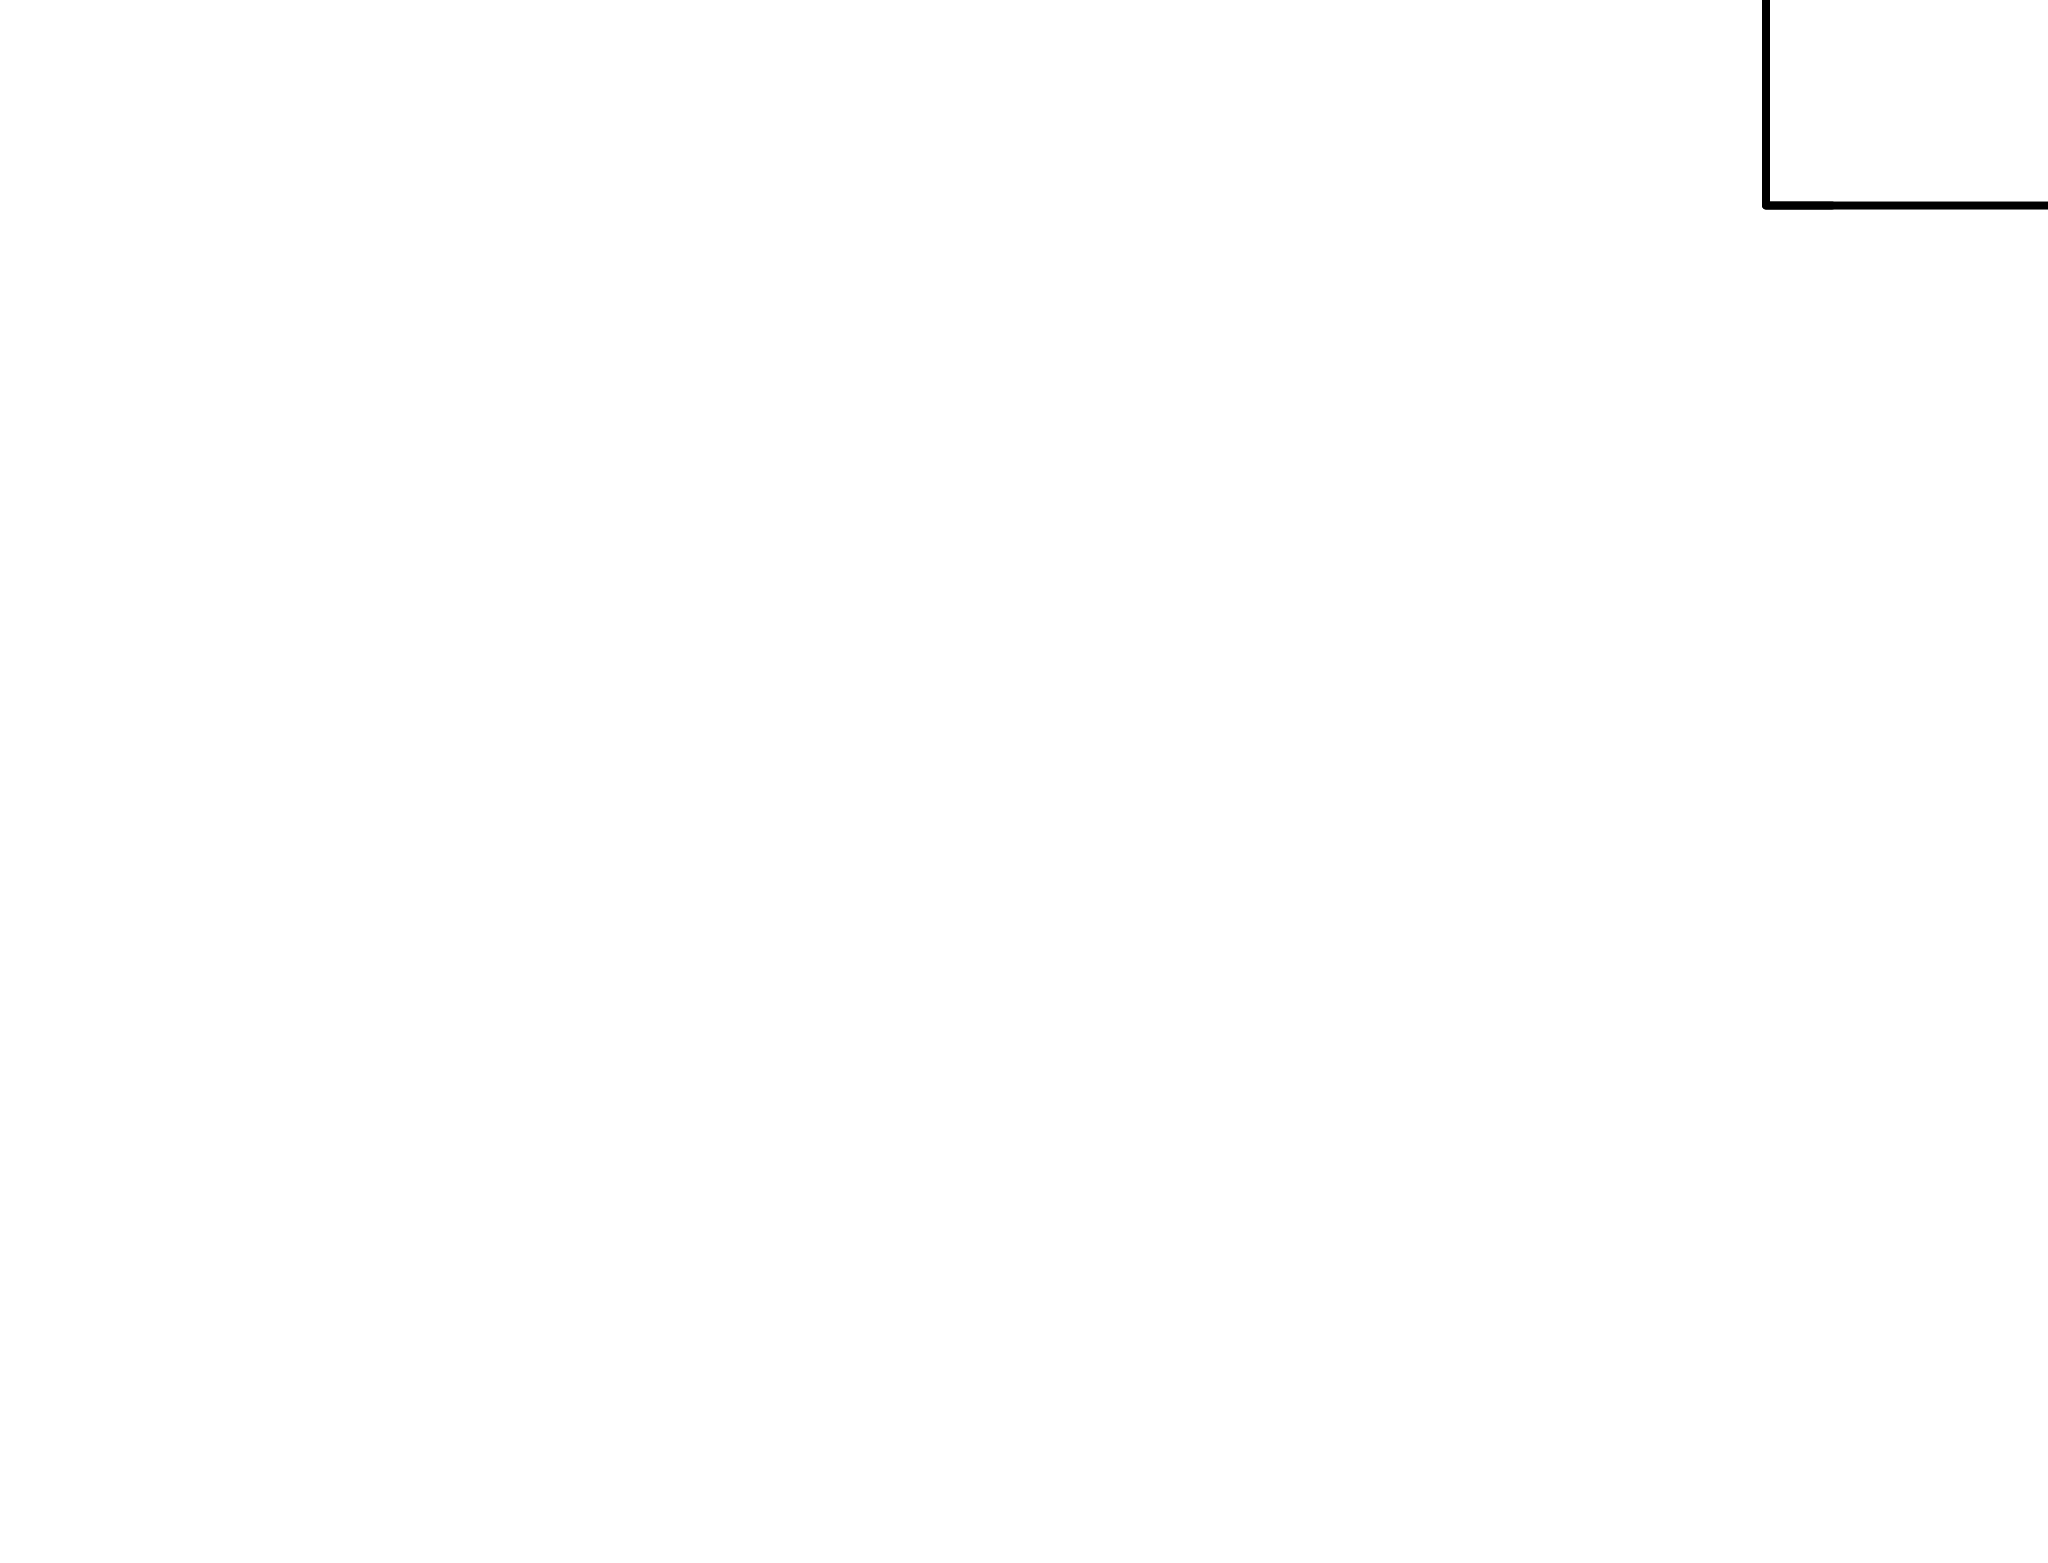

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.01")
Plot("data")

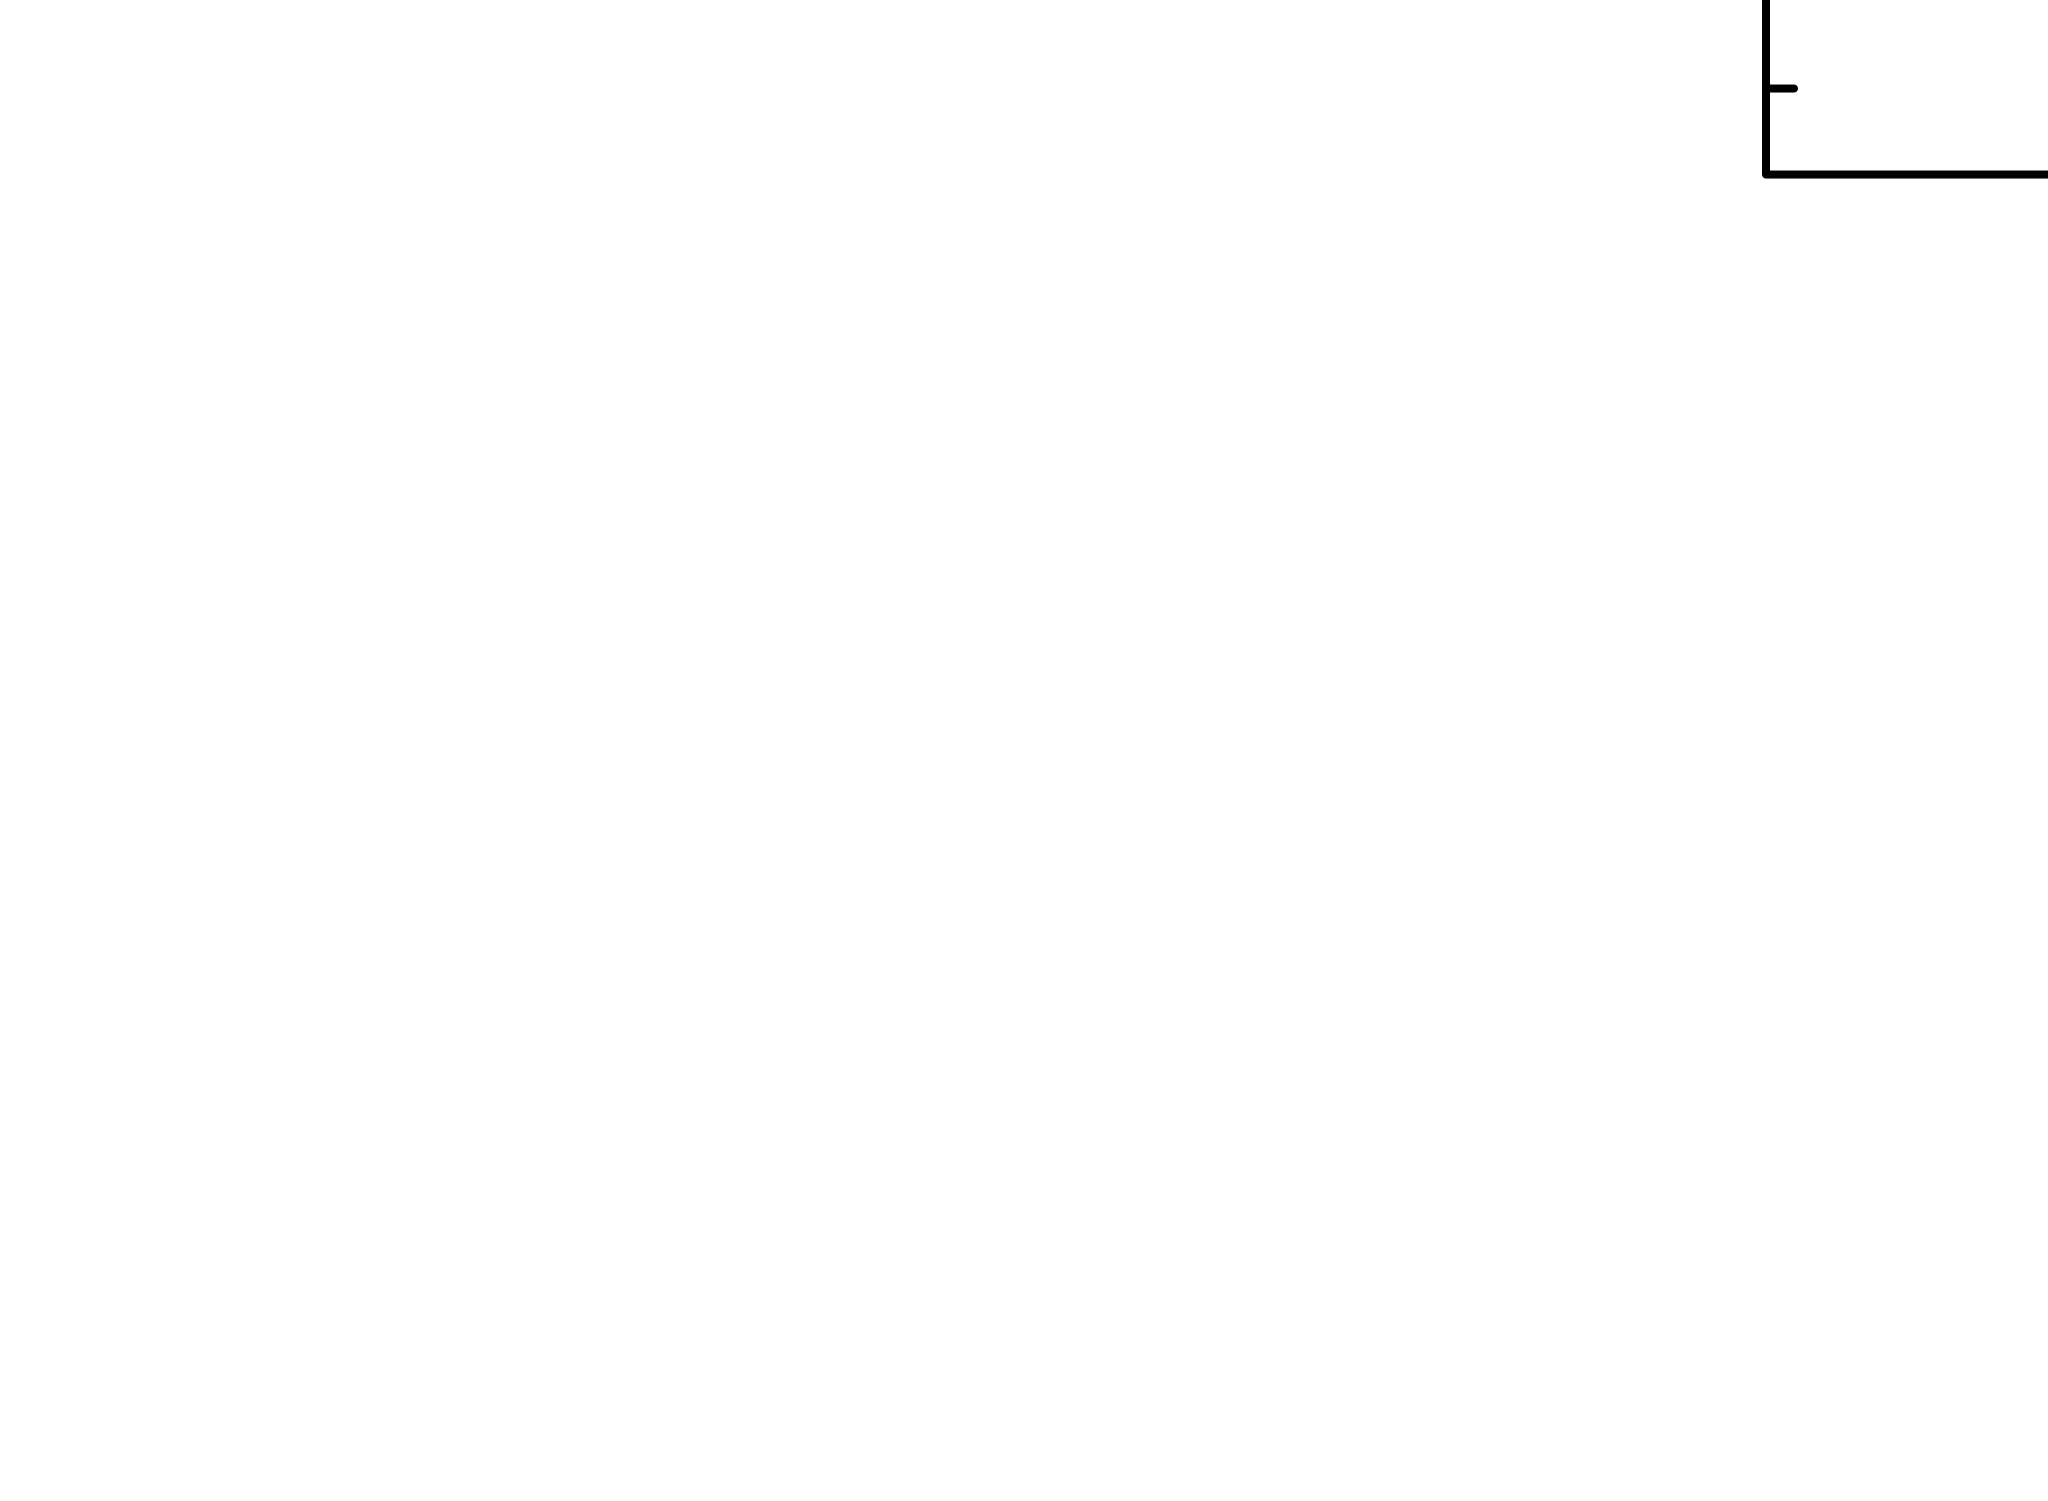

      No channels ignored (no channels in specified range)
     1 channels (21) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.217030e+11     using 20 bins.

Test statistic : Chi-Squared              2.217030e+11     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 17 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
38.7304      6.40125      -3      0.223905      0.664832   6.84191e-06
33.4805      610393       -4      0.488664       2.08068   2.05559e-05
16.1187      339622       -5      0.641327       2.10897   4.18522e-0

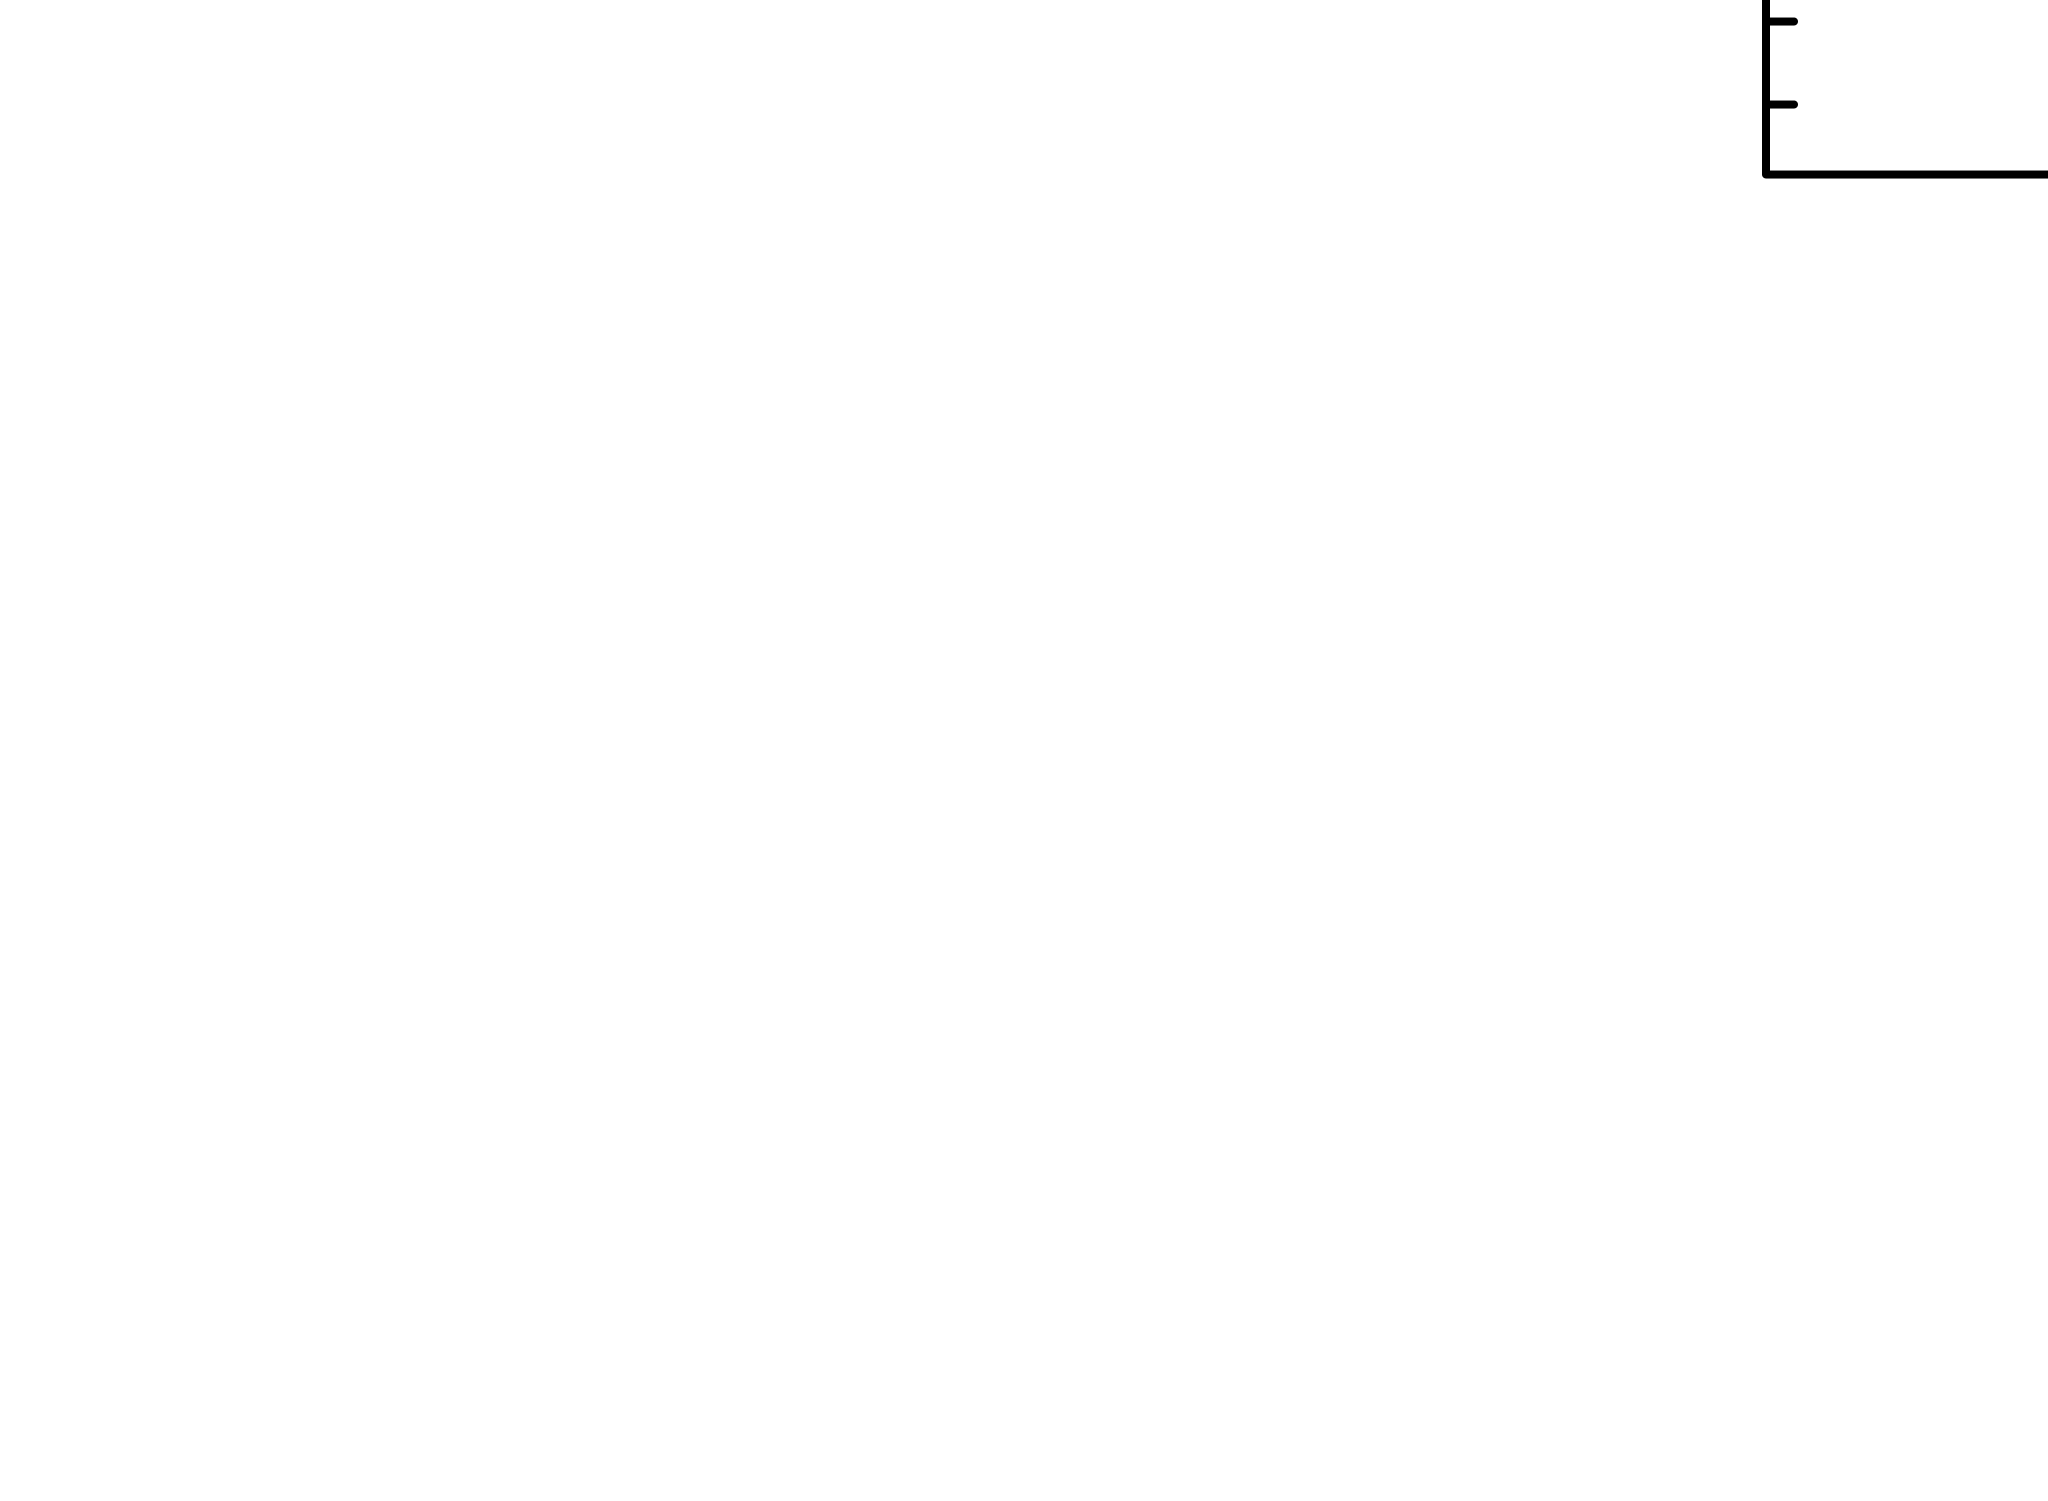

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.448270e+10     using 20 bins.

Test statistic : Chi-Squared              3.448270e+10     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 17 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
20.248       4.57865       0      0.683708       4.46427   4.33516e-05
16.6395      27762.3      -1      0.399804       4.35475   3.79891e-05
16.2245      33260        -2      0.436846       4.56441   3.76956e-05


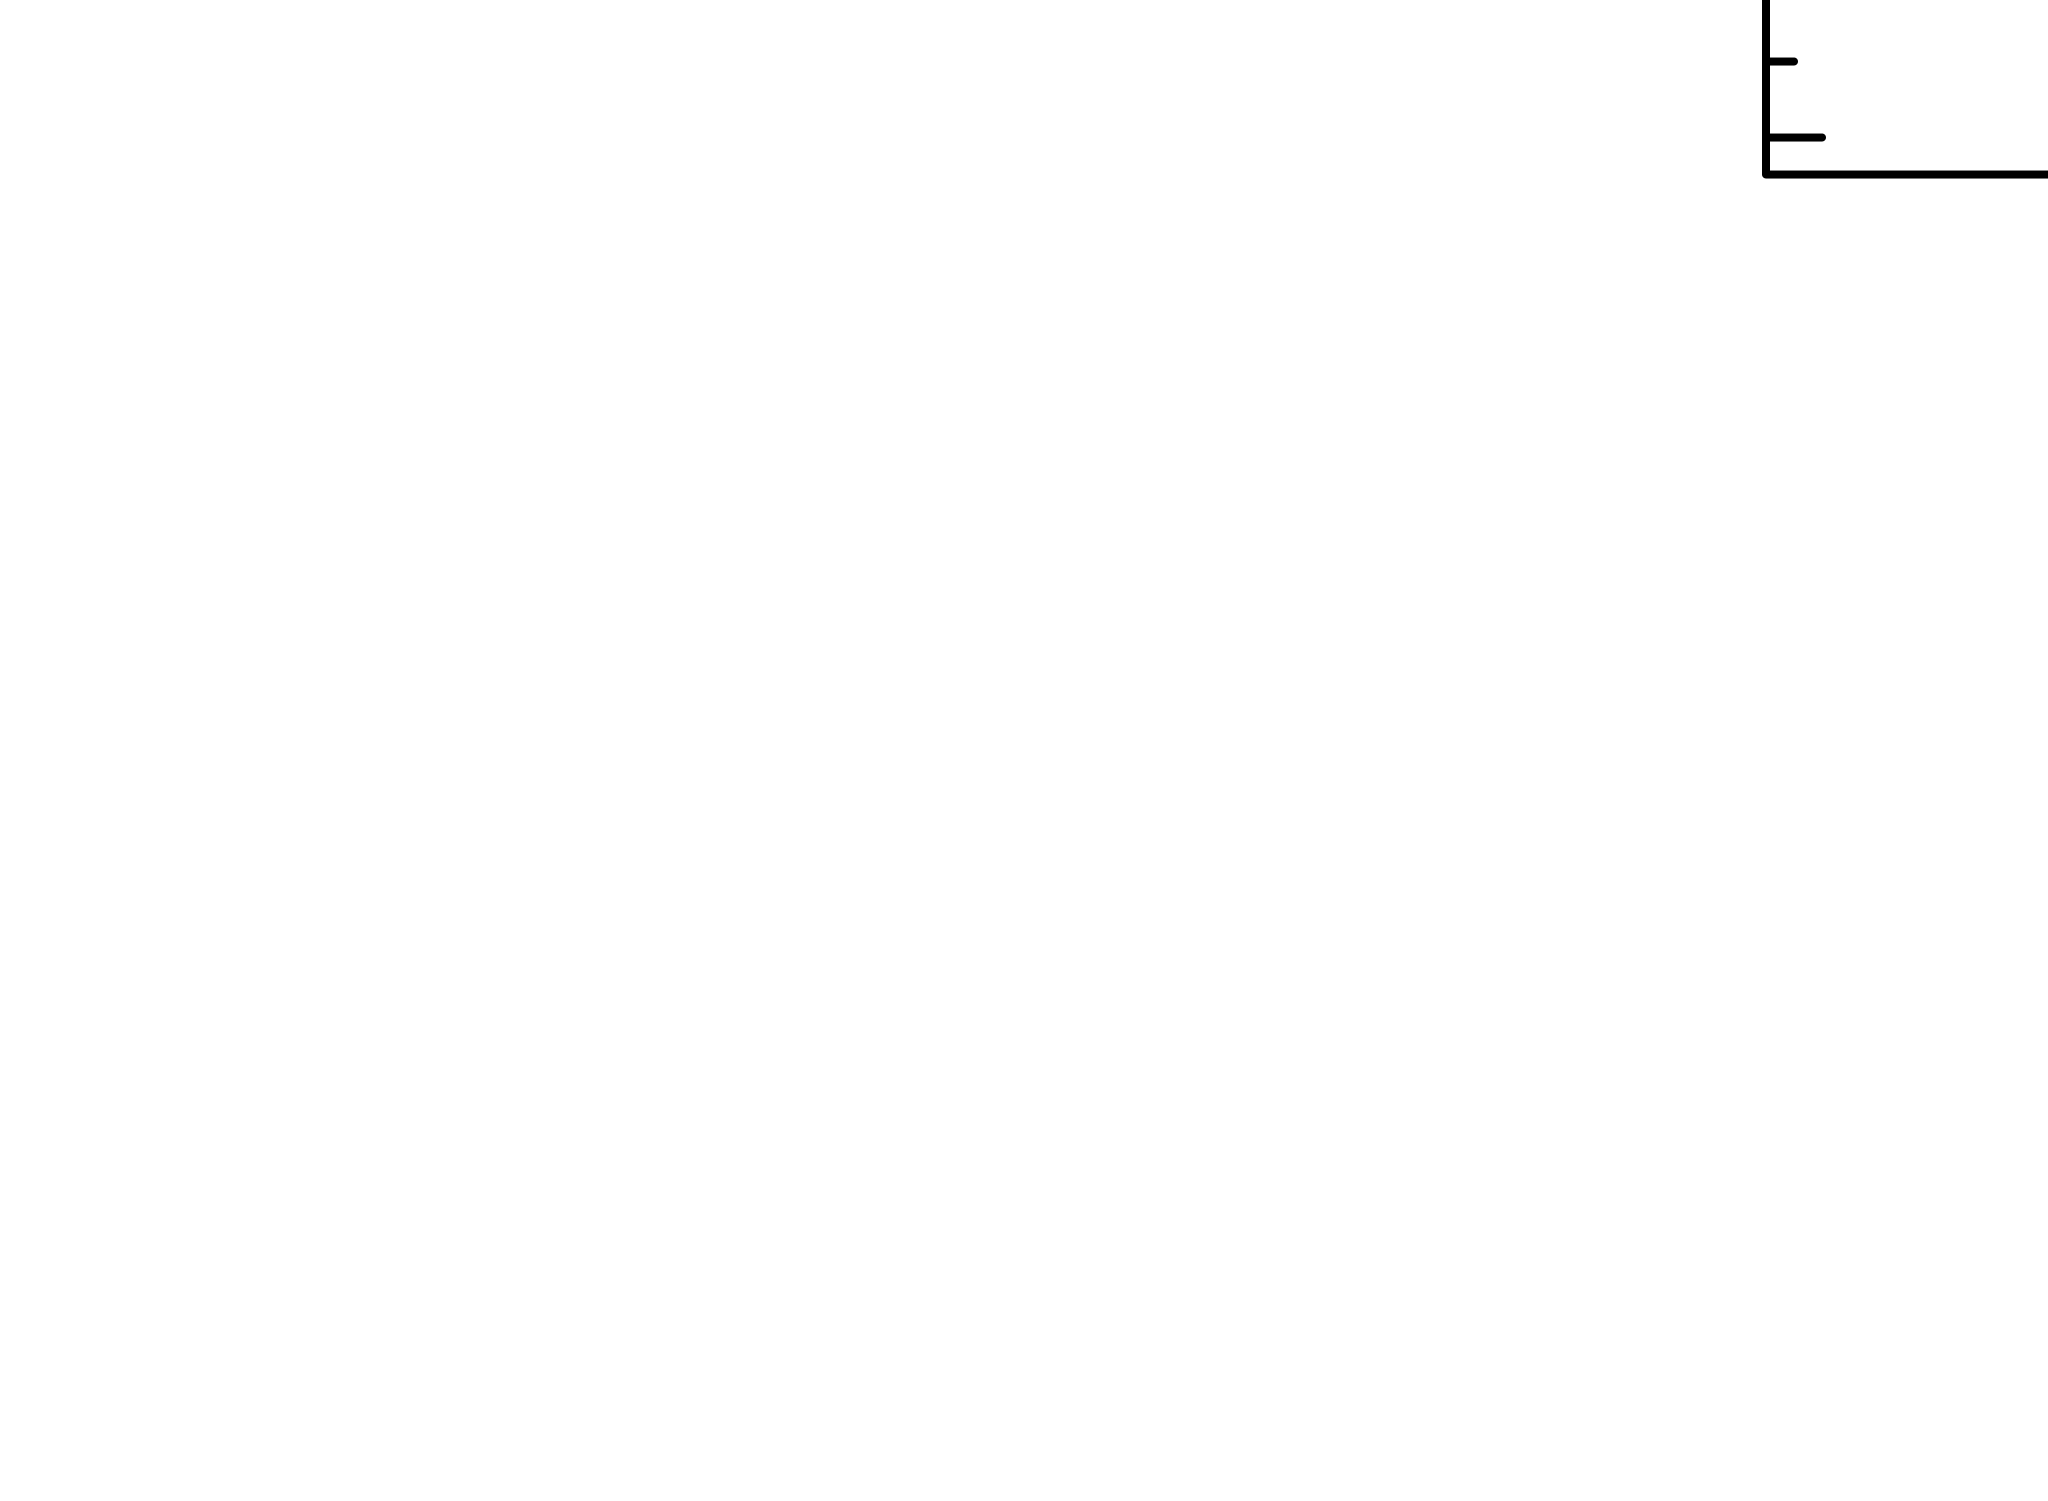

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              8.365891e+09     using 20 bins.

Test statistic : Chi-Squared              8.365891e+09     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 17 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
21.3188      11.0853      -3       1.32494       1.16177   

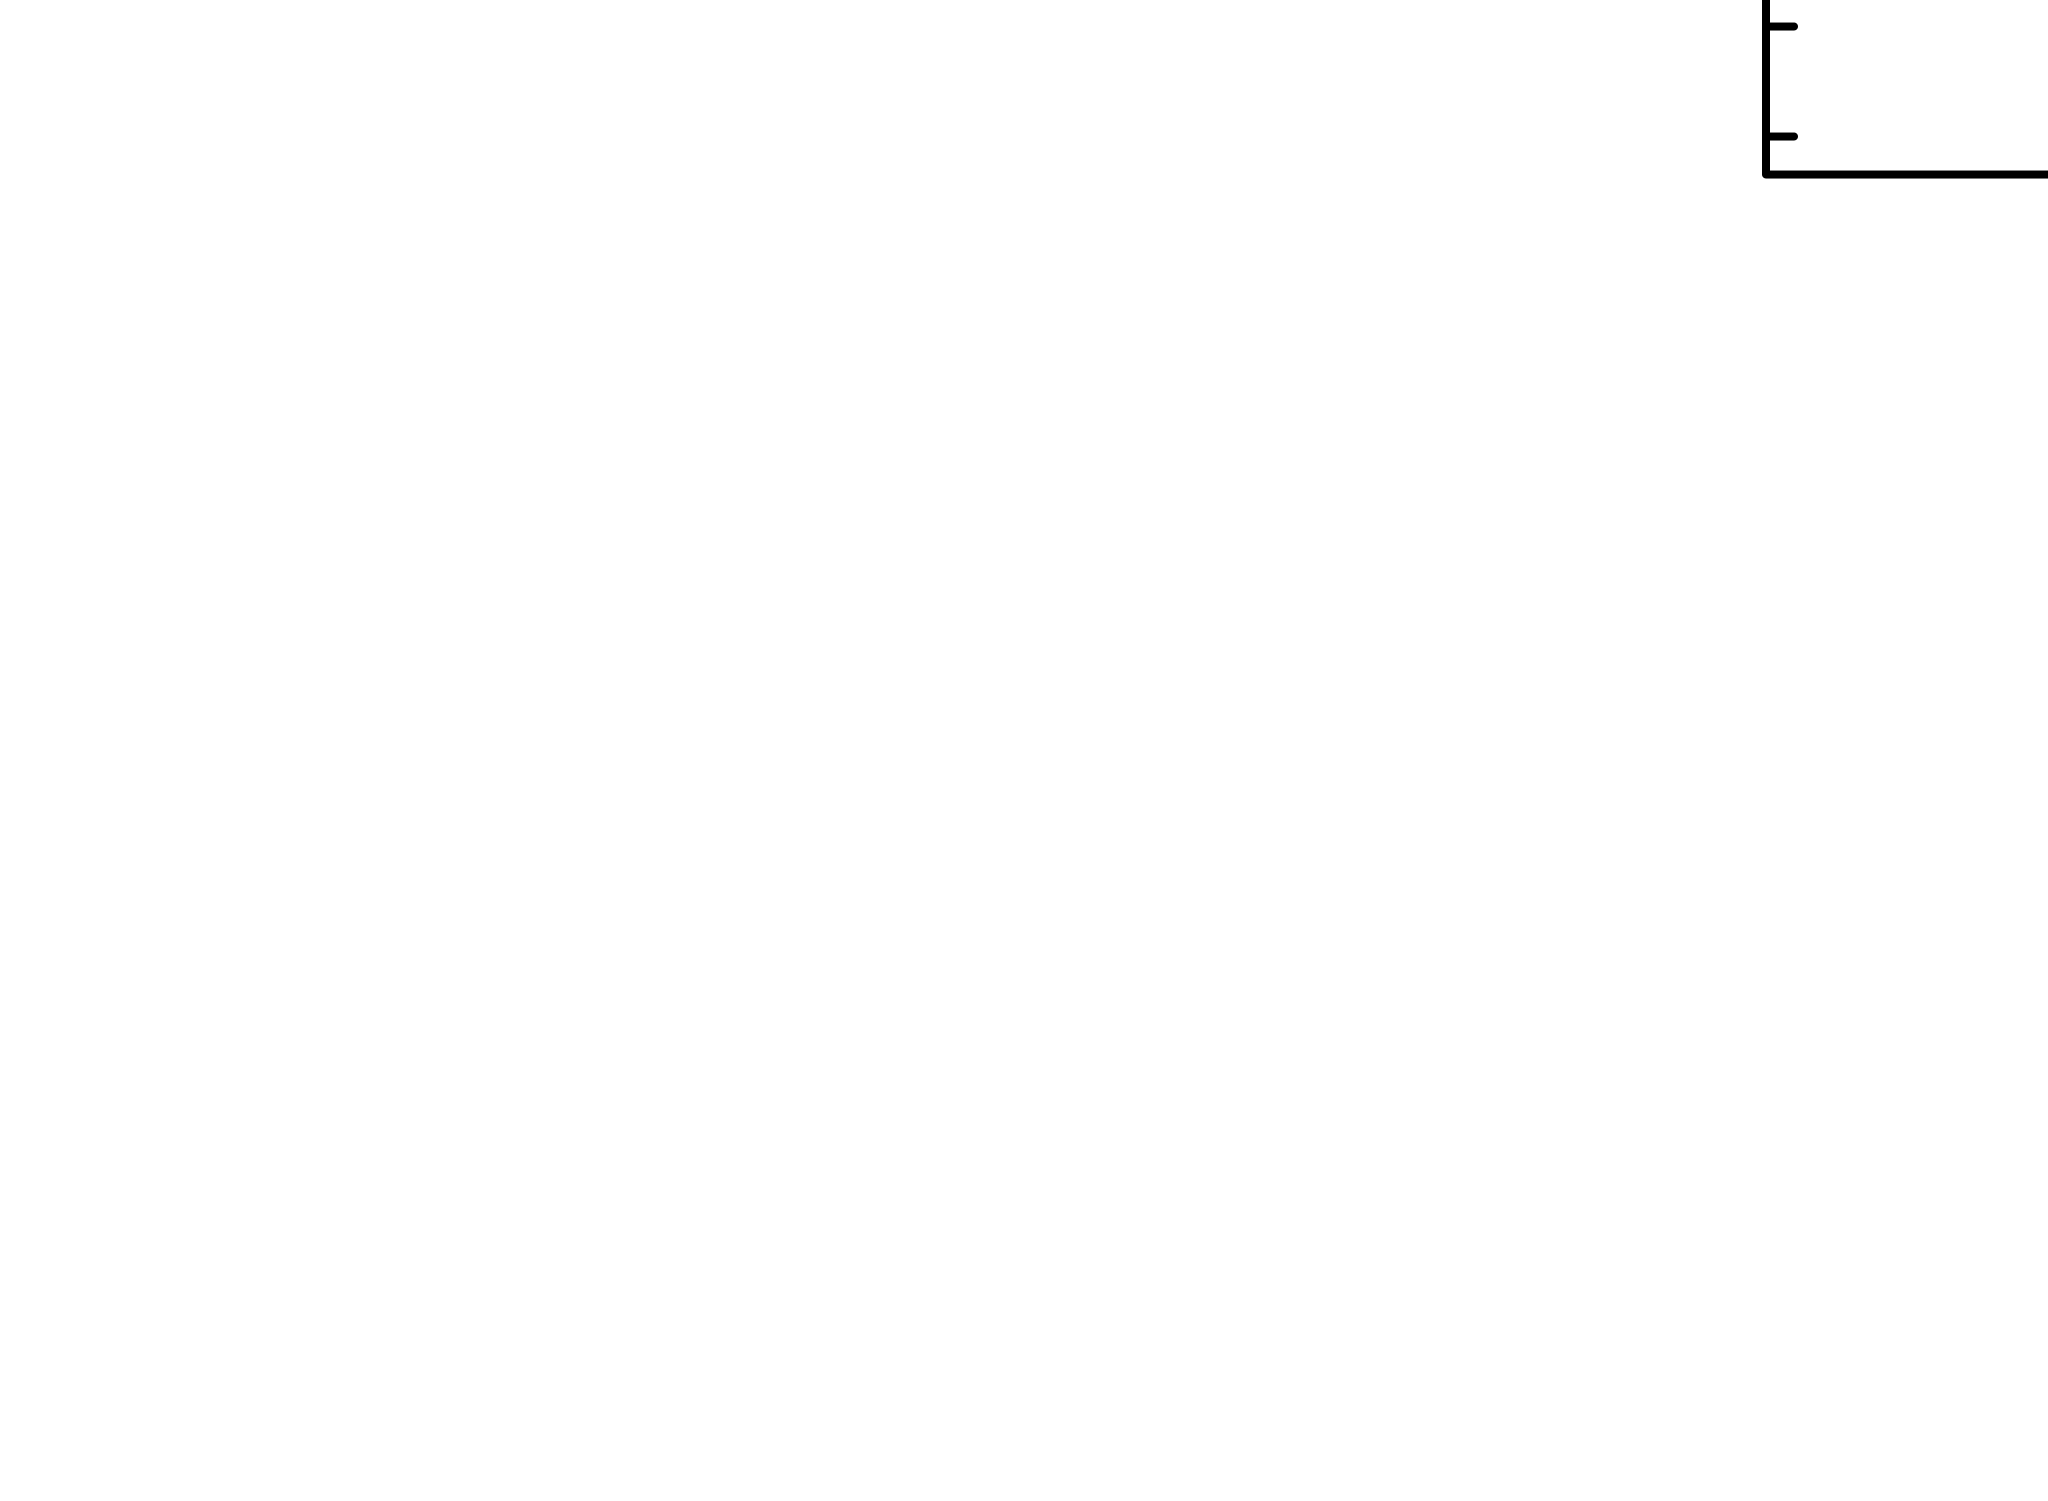

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")